# Face recognition using Deep Learning(CNN)

* Convolutional neural networks (CNN) is used to convert digital image content into a single vector of numbers(numeric vector) representing the unique characteristics of the image. 
* The column of numbers is inputted to a Dense fully connected Neural network layer against the labels, which image is cat, which image is bird etc.
* The classification model learns these numeric vector inputs against the labels

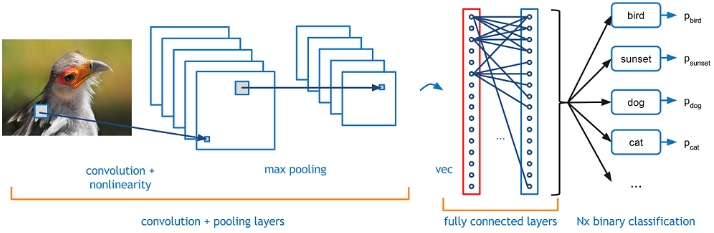

### Reading the Images data

In [21]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''########################## IMAGE PRE-PROCESSING for TRAINING and TESTING data ##############################'''

TrainingImagePath='E:/IVY/ML with PYTHON/Materials/Dataset/Deep Learning Notebooks/Deep Learning Notebooks/Face Images/Final Training Images'

from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=5,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=5,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

### Creating a list of faces and classes

In [22]:
'''#################### Creating lookup table for all faces ##############################'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("E:/IVY/ML with PYTHON/Materials/DEEP LEARNING/Face Detection/ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('/n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}
/n The Number of output neurons:  16


### Creating the CNN model

In [23]:
'''######################## Create CNN deep learning model ####################################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

### Fitting the model

In [29]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
classifier.fit(
                    training_set,
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
30/30 [==============================] - 2s 56ms/step - loss: 1.2325e-04 - accuracy: 1.0000 - val_loss: 1.0015e-05 - val_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 2s 53ms/step - loss: 1.5742e-04 - accuracy: 1.0000 - val_loss: 3.2571e-05 - val_accuracy: 1.0000
Epoch 3/10
30/30 [==============================] - 2s 54ms/step - loss: 2.4348e-04 - accuracy: 1.0000 - val_loss: 4.5307e-05 - val_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 2s 54ms/step - loss: 6.9717e-04 - accuracy: 1.0000 - val_loss: 2.7641e-05 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 2s 53ms/step - loss: 2.3082e-04 - accuracy: 1.0000 - val_loss: 6.3535e-06 - val_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 2s 54ms/step - loss: 3.8501e-04 - accuracy: 1.0000 - val_loss: 1.4168e-05 - val_accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 2s 66ms/step - loss: 3.1111e-04 - accuracy: 1.0000 - v

### Saving the model

In [30]:
## Saving the model
classifier.save("E:/IVY/ML with PYTHON/Materials/DEEP LEARNING/Face Detection/classifier.pkl")

INFO:tensorflow:Assets written to: E:/IVY/ML with PYTHON/Materials/DEEP LEARNING/Face Detection/classifier.pkl\assets


### Testing the model on a different face

In [37]:
'''########################## Making single predictions ############################'''
import numpy as np
from keras.preprocessing import image

testImage='E:/IVY/ML with PYTHON/Materials/Dataset/Deep Learning Notebooks/Deep Learning Notebooks/Face Images/Final Testing Images/face2/3face2.jpg'
test_image=image.load_img(testImage,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
print(result)
print(ResultMap)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
{0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}
########################################
Prediction is:  face2
